# El tratamiento de las variables categóricas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
data = pd.read_csv("../../datasets/ecom-expense/Ecom Expense.csv")
data.head(3)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455


In [3]:
dummy_gender = pd.get_dummies(data["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(data["City Tier"], prefix = "City")

In [4]:
column_names = data.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [5]:
data_new = data[column_names].join(dummy_gender)
column_names = data_new.columns.values.tolist()
data_new.head(3)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1


In [6]:
data_new = data_new[column_names].join(dummy_city_tier)
data_new.head(4)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0


In [7]:
feature_cols = ["Monthly Income","Transaction Time",
                "Gender_Female",
                "City_Tier 1","City_Tier 2",
                "Record"]

In [8]:
X = data_new[feature_cols]
Y = data_new["Total Spend"]

In [9]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [10]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920573),
 ('Transaction Time', 0.1549461254958957),
 ('Gender_Female', -262.0500265110939),
 ('City_Tier 1', 208.6676263302228),
 ('City_Tier 2', 187.04227462896029),
 ('Record', 772.233445744564)]

In [11]:
lm.score(X, Y)

0.9179923586131016

In [12]:
data_new["Prediction"] = lm.predict(X)

In [13]:
SSD = sum((data_new["Prediction"] - data_new["Total Spend"]) ** 2)
RSE = np.sqrt(SSD/(len(data_new)-len(feature_cols) - 1))

error = RSE/np.mean(data_new["Total Spend"])

(SSD, RSE , error)

(1517733985.3408144, 802.7907758991199, 0.1302560111403037)

## Reducir variables *dummy* redundantes
Como en econometría, se trata del *dummy trap*

In [14]:
dummy_gender = pd.get_dummies(data["Gender"], prefix = "Gender").iloc[:,:-1]
dummy_city_tier = pd.get_dummies(data["City Tier"], prefix = "City").iloc[:,:-1]

In [15]:
column_names = data.columns.values.tolist()
data_new = data[column_names].join(dummy_gender)
column_names = data_new.columns.values.tolist()
data_new = data_new[column_names].join(dummy_city_tier)
data_new.head(4)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,City_Tier 1,City_Tier 2
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,1
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,1,0


In [16]:
feature_cols = ["Monthly Income", "Transaction Time",
                "Gender_Female", "City_Tier 1", "City_Tier 2",
                "Record"]

X = data_new[feature_cols]
Y = data_new["Total Spend"]

In [17]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [18]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920573),
 ('Transaction Time', 0.1549461254958957),
 ('Gender_Female', -262.0500265110939),
 ('City_Tier 1', 208.6676263302228),
 ('City_Tier 2', 187.04227462896029),
 ('Record', 772.233445744564)]

In [19]:
lm.score(X, Y)

0.9179923586131016

## Transformación de variables para conseguir una relación no-lineal

In [20]:
data_auto = pd.read_csv("../../datasets/auto/auto-mpg.csv")
data_auto.head(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst


In [21]:
data_auto.shape

(406, 9)

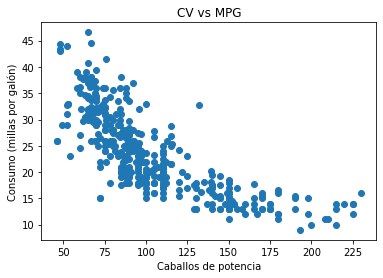

In [22]:
data_auto.mpg = data_auto.mpg.dropna()
data_auto.horsepower = data_auto.horsepower.dropna()
plt.scatter(data_auto.horsepower, data_auto.mpg)
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (millas por galón)")
plt.title("CV vs MPG")
plt.show()

### Modelo de regresión lineal
$ \text{mpg} = \beta_0 + \beta_1\text{mpg} + \varepsilon$

In [23]:
X = pd.DataFrame(data_auto["horsepower"].fillna(data_auto["horsepower"].mean()))
Y = pd.DataFrame(data_auto["mpg"].fillna(data_auto["mpg"].mean()))

In [24]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

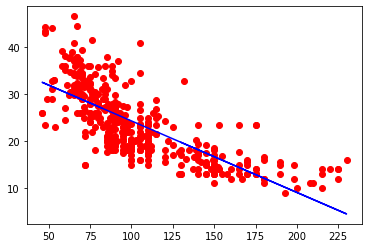

In [25]:
plt.scatter(X, Y, color = "red")
plt.plot(X, lm.predict(X), color = "blue")
plt.show()

In [26]:
lm.score(X, Y)

0.574653340645025

In [27]:
SSD = float(np.sum((Y - lm.predict(X))**2))
RSE = np.sqrt(SSD/(len(X)-2))
error = RSE/float(np.mean(Y))

(SSD, RSE, float(np.mean(Y)), error)

(10315.75196006092, 5.053121758388698, 23.51457286432162, 0.2148931978286426)

### Modelo de regresión cuadrático

In [28]:
X["horsepower2"] = X["horsepower"] ** 2

In [29]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [30]:
lm.score(X, Y)

0.6439066584257469

In [31]:
SSD = float(np.sum((Y - lm.predict(X))**2))
RSE = np.sqrt(SSD/(len(X)-2))
error = RSE/float(np.mean(Y))

(SSD, RSE, float(np.mean(Y)), error)

(8636.180643524502, 4.623492701540607, 23.51457286432162, 0.19662244039974788)

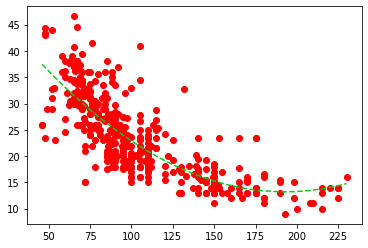

In [32]:
plt.scatter(X["horsepower"], Y, color = "red")
plt.plot(np.sort(X.iloc[:,0]),lm.predict(X.sort_values(by = ["horsepower"])), color = "#0ACA19", linestyle = "--")
plt.show()

In [33]:
X = pd.DataFrame(data_auto["horsepower"].fillna(data_auto["horsepower"].mean()))

In [34]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

In [35]:
lm = LinearRegression()
lm.fit(X_poly, Y)

LinearRegression()

In [36]:
lm.score(X_poly, Y)

0.6439066584257469

Polinomio grado 1:  0.57465
Polinomio grado 2:  0.64391
Polinomio grado 3:  0.64447
Polinomio grado 4:  0.64677
Polinomio grado 5:  0.65475
Polinomio grado 6:  0.65728
Polinomio grado 7:  0.65386
Polinomio grado 8:  0.65124
Polinomio grado 9:  0.65105
Polinomio grado 10:  0.65236
Polinomio grado 11:  0.65114
Polinomio grado 12:  0.60304
Polinomio grado 13:  0.57067
Polinomio grado 14:  0.53495
Polinomio grado 15:  0.50121
Polinomio grado 16:  0.47164
Polinomio grado 17:  0.44568
Polinomio grado 18:  0.42184
Polinomio grado 19:  0.39877
Polinomio grado 20:  0.37562


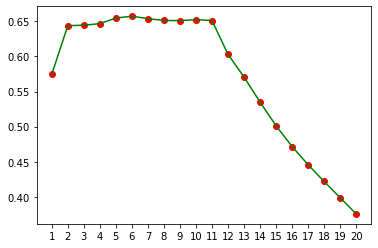

In [37]:
score = []
max_d = 20
for i in range(1,max_d+1):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X)
    lm = LinearRegression()
    lm.fit(X_poly, Y)
    score.append(lm.score(X_poly, Y))
    print("Polinomio grado {}: ".format(i),round(lm.score(X_poly, Y),5))
    
plt.plot(range(1,max_d+1),score, color = "green")
plt.scatter(range(1,max_d+1),score, color = "red")
plt.xticks(np.arange(1,max_d+1,1))
plt.show()

Polinomio grado 1:  0.57465


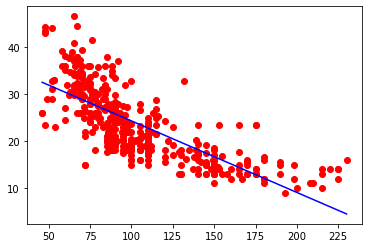

Polinomio grado 2:  0.64391


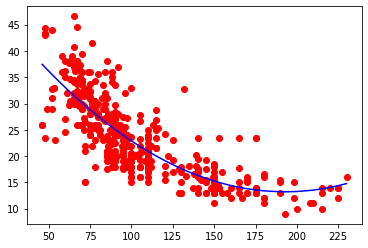

Polinomio grado 3:  0.64447


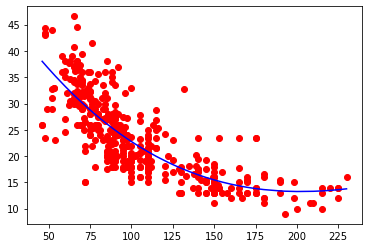

Polinomio grado 4:  0.64677


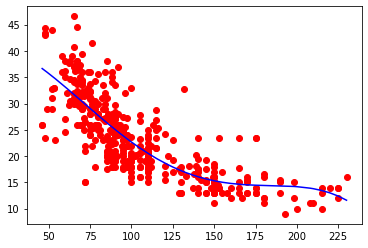

Polinomio grado 5:  0.65475


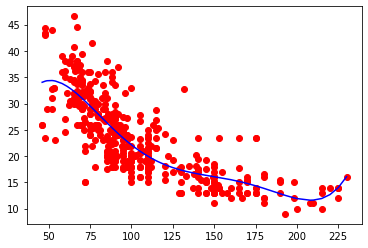

Polinomio grado 6:  0.65728


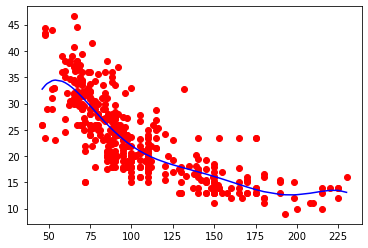

Polinomio grado 7:  0.65386


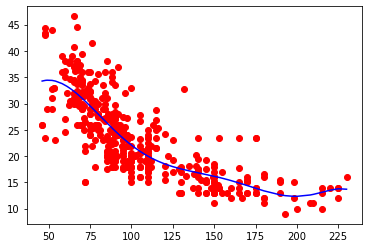

Polinomio grado 8:  0.65124


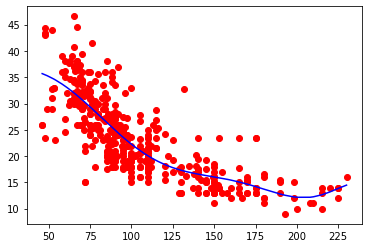

Polinomio grado 9:  0.65105


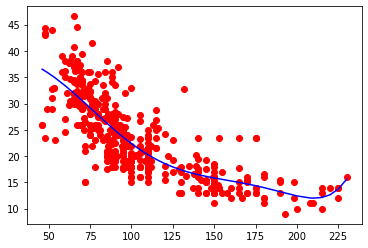

Polinomio grado 10:  0.65236


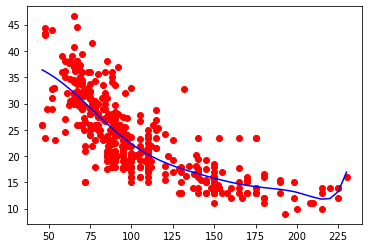

In [38]:
max_d = 10
for i in range(1,max_d+1):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X)
    lm = LinearRegression()
    lm.fit(X_poly, Y)
    print("Polinomio grado {}: ".format(i),
          round(lm.score(X_poly, Y),5))
    plt.scatter(data_auto["horsepower"], Y, color = "red")
    plt.plot(pd.DataFrame(X_poly).sort_values(by = [1])[1],
             lm.predict(pd.DataFrame(X_poly).sort_values(by = [1])),
             color = "blue")
    plt.show()

## El problema de los outliers

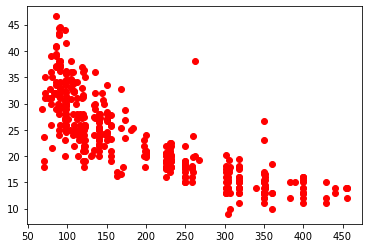

In [42]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")
plt.show()

In [53]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = pd.DataFrame(X)
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [56]:
lm.score(X, Y)

0.6261049762826918

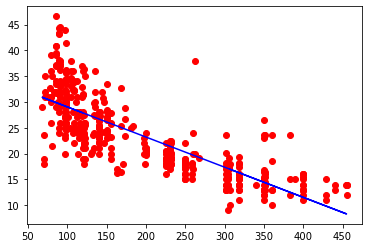

In [57]:
plt.scatter(X, Y, color = "red")
plt.plot(X, lm.predict(X), color = "blue")
plt.show()

In [77]:
data_auto.loc[((data_auto.displacement > 250) & (data_auto.mpg >  35)) |
              ((data_auto.displacement > 300) & (data_auto.mpg >  20))]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [80]:
data_auto_clean = data_auto.drop([258,305,372,395], axis = 0)

In [81]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = pd.DataFrame(X)
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [82]:
lm.score(X, Y)

0.6466514317531822

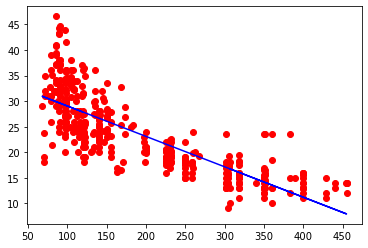

In [83]:
plt.scatter(X, Y, color = "red")
plt.plot(X, lm.predict(X), color = "blue")
plt.show()